# KSA: Polar Observations and Modelling

## Week 5 - Working with multiple CTDs

In `1_Introduction_to_CTDs.ipynb` we worked with a single CTD profile, understanding how the files are structured, how to compare sensor data with bottle samples, etc. In this notebook we are going to level up a bit, and look at a bunch of different profiles from the same oceanographic voyage, the Multidisciplinary Investigations of the Southern Ocean [(MISO)](https://aappartnership.org.au/miso/). 

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cft
import glob
import gsw
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib.cm import ScalarMappable

*We have imported a new library. Use [CoPilot](https://copilot.microsoft.com/) to understand what it is used for.*

First of all, we need to load all of our CTDs. Remember that to open, we need to use `xr.open(path_to_file)`. We have 22 different profiles in our `data` directory (sometimes you might have hundreds of files!), so instead of typing one by one, we'll use `glob` to create a list with the files, and then iterate through the list in order to open them and saving them to a dictionary.

From now on, if you need help understanding what a "dictionary", an "iteration", or anything else is, use [CoPilot](https://copilot.microsoft.com/).

In [3]:
path_to_files = glob.glob('data/*Ctd*') 

In the above, the * serve as a wildcard. we're asking to list all the files that have `something Ctd something` in their name. This is because we have other files in our folder (HydroChem) which we'd like to ignore.

In [4]:
# Initialise dictionary
CTDs = {}
# Sort paths in descending order
path_to_files = np.sort(path_to_files)
for i in range(0, len(path_to_files)):
    CTDs[i] = xr.open_dataset(path_to_files[i])

## Understanding our dataset 

### Location of profiles

Let's create a map where we can see the locations of all CTD profiles in our dataset. First, let's iterate to get (a) latitude, (b) longitude and (c) date information for each profile.

In [5]:
lat = []
lon = []
date = []
for i in range(0, len(CTDs)):
    lat.append(CTDs[i]['latitude'])
    lon.append(CTDs[i]['longitude'])

    year = CTDs[i]['time.year'].item()
    mon = CTDs[i]['time.month'].item()
    day = CTDs[i]['time.day'].item()

    date.append(str(day)+'-'+str(mon)+'-'+str(year))

Let's plot the locations:

Text(0, 0.5, 'Latitude')

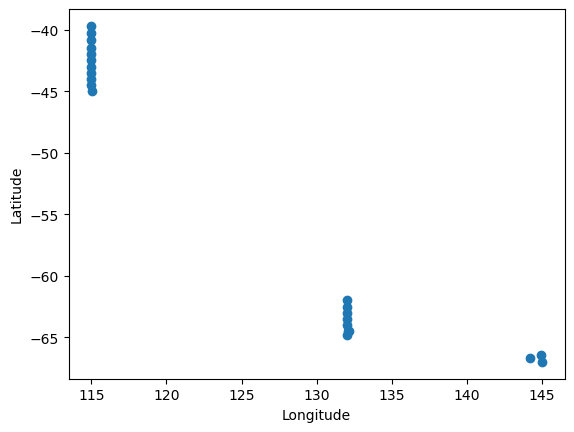

In [6]:
plt.scatter(lon, lat)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

We can do better than that! It is hard to understand these locations without any reference points.

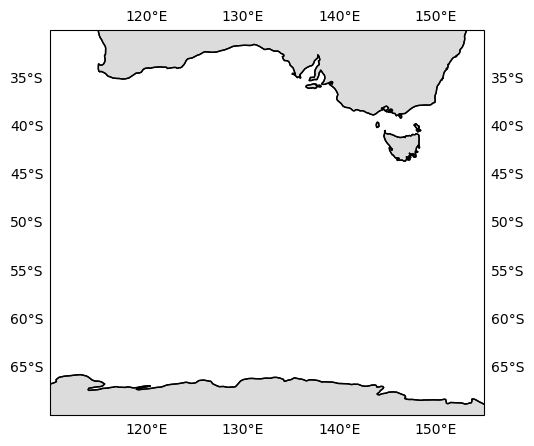

In [7]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(projection = ccrs.PlateCarree(central_longitude = 130))
ax.set_extent([110, 155, -70, -30], crs = ccrs.PlateCarree())
ax.add_feature(cft.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='gainsboro'))
ax.coastlines(resolution = "50m")
gl = ax.gridlines(draw_labels = True, linewidth = 0)
gl.xformatter = ccrs.cartopy.mpl.ticker.LongitudeFormatter()
gl.yformatter = ccrs.cartopy.mpl.ticker.LatitudeFormatter()

Looking good! But we can make it better. Let's add some bathymetry information:

In [8]:
bathymetry = xr.open_dataset('data/ETOPO_2022_v1_bed.nc')

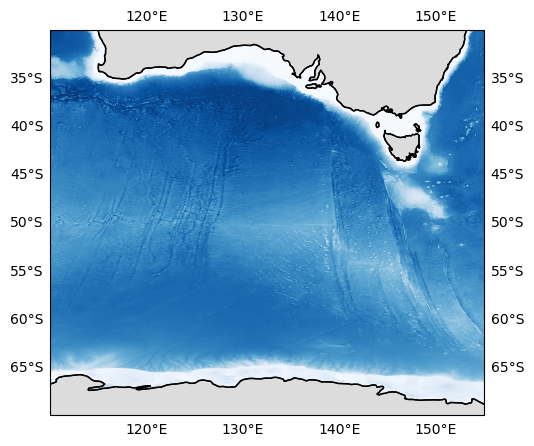

In [9]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(projection = ccrs.PlateCarree(central_longitude = 130))
ax.set_extent([110, 155, -70, -30], crs = ccrs.PlateCarree())
ax.add_feature(cft.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='gainsboro'))
ax.coastlines(resolution = "50m")
gl = ax.gridlines(draw_labels = True, linewidth = 0)
gl.xformatter = ccrs.cartopy.mpl.ticker.LongitudeFormatter()
gl.yformatter = ccrs.cartopy.mpl.ticker.LatitudeFormatter()

bathymetry['z'].plot.pcolormesh(ax = ax, add_colorbar = False, 
                                cmap = 'Blues_r', vmax = 0.1, vmin = -6000,
                                transform = ccrs.PlateCarree());

And now let's plot our locations:

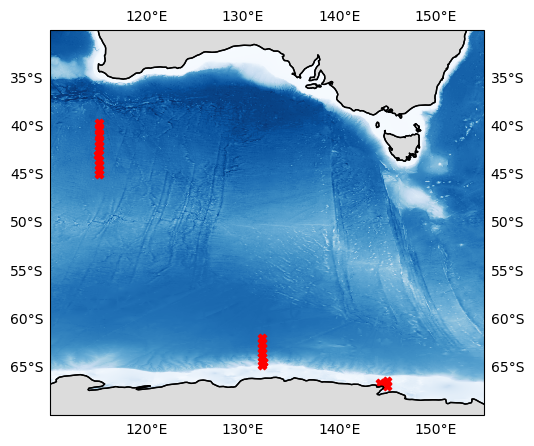

In [10]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(projection = ccrs.PlateCarree(central_longitude = 130))
ax.set_extent([110, 155, -70, -30], crs = ccrs.PlateCarree())
ax.add_feature(cft.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='gainsboro'))
ax.coastlines(resolution = "50m")
gl = ax.gridlines(draw_labels = True, linewidth = 0)
gl.xformatter = ccrs.cartopy.mpl.ticker.LongitudeFormatter()
gl.yformatter = ccrs.cartopy.mpl.ticker.LatitudeFormatter()

bathymetry['z'].plot.pcolormesh(ax = ax, add_colorbar = False, 
                                cmap = 'Blues_r', vmax = 0.1, vmin = -6000,
                                transform = ccrs.PlateCarree());

ax.scatter(lon, lat, marker = 'X', color = 'red', transform = ccrs.PlateCarree());

An even better map would have a different color for each location in order to tease them apart. For that we will create a list of colors by sampling a colormap. You can view and choose a colormap [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html). Remember to choose colorblind friendly ones.

In [11]:
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(CTDs)))

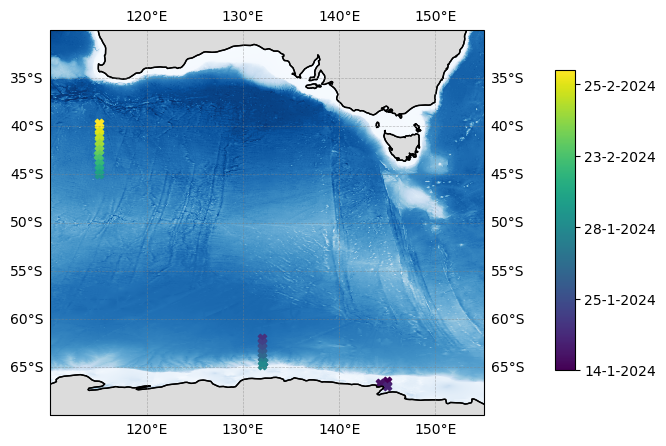

In [12]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(projection = ccrs.PlateCarree(central_longitude = 130))
ax.set_extent([110, 155, -70, -30], crs = ccrs.PlateCarree())
ax.add_feature(cft.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='gainsboro'))
ax.coastlines(resolution = "50m")
gl = ax.gridlines(draw_labels = True, linewidth = 0.5, color = 'gray', alpha = 0.5, linestyle = '--')
gl.xformatter = ccrs.cartopy.mpl.ticker.LongitudeFormatter()
gl.yformatter = ccrs.cartopy.mpl.ticker.LatitudeFormatter()

bathymetry['z'].plot.pcolormesh(ax = ax, add_colorbar = False, 
                                cmap = 'Blues_r', vmax = 0.1, vmin = -6000,
                                transform = ccrs.PlateCarree());

for i in range(0, len(CTDs)):
    ax.scatter(lon[i], lat[i], marker = 'X', color = colors[i], transform = ccrs.PlateCarree());

# Add a colorbar with dates to reference each profile location
cax = fig.add_axes([.8, 0.2, 0.02, 0.6])
mapper = ScalarMappable(cmap = 'viridis')
mapper.set_array(np.arange(0, len(CTDs), 1))
cbar = plt.colorbar(mapper, cax = cax)
cbar.set_ticks(np.arange(0, len(CTDs), 5))
cbar.set_ticklabels(date[::5]);

## Plot the data

Now let's see different ways of visualising this dataset. Let's start by calculating densities and doing a similar figure to the one in `Introduction_to_CTDs.ipynb`

In [13]:
temperature = {}; salinity = {}; density = {}
absolute_salinity = {}; conservative_temperature = {}
for i in range(0, len(CTDs)):
    temperature[i] = CTDs[i]['temperature'].squeeze()
    salinity[i] = CTDs[i]['salinity'].squeeze()

    absolute_salinity[i] = gsw.SA_from_SP(salinity[i], CTDs[i]['pressure'], CTDs[i]['longitude'], CTDs[i]['latitude'])
    absolute_salinity[i] = absolute_salinity[i].squeeze()

    conservative_temperature[i] = gsw.CT_from_t(absolute_salinity[i], temperature[i], CTDs[i]['pressure'])
    conservative_temperature[i] = conservative_temperature[i].squeeze()
        
    density[i] = gsw.sigma0(absolute_salinity[i], conservative_temperature[i])
    density[i] = density[i].rename('density')

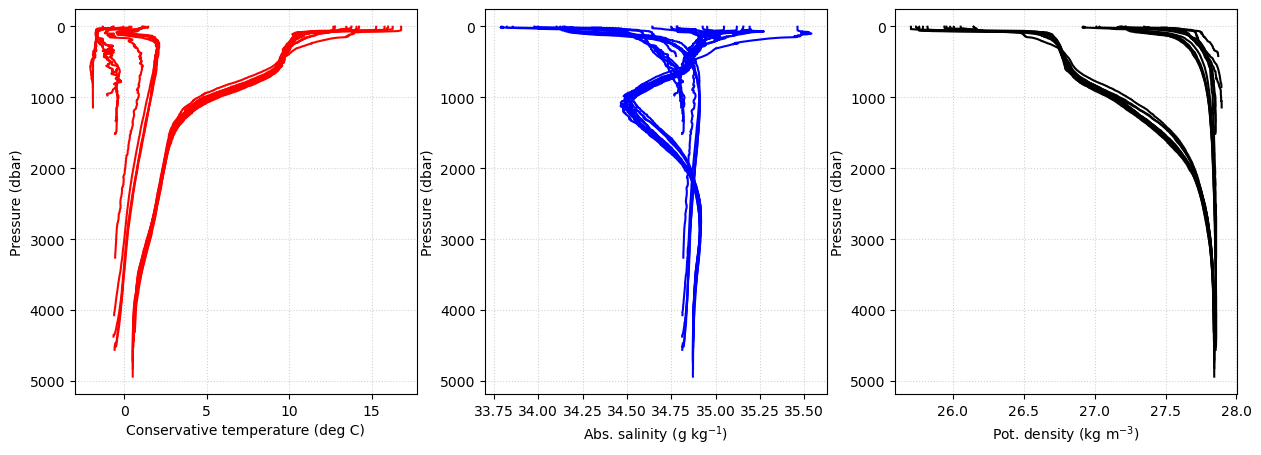

In [14]:
# Create a figure instance
fig = plt.figure(figsize = (15,5))
# Add two axes to the figure
axs = [fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)]

# Iterate to plot
for i in range(0, len(CTDs)):
    conservative_temperature[i].plot(ax = axs[0], y = 'pressure', color = 'red', label = None)
    absolute_salinity[i].plot(ax = axs[1], y = 'pressure', color = 'blue')
    density[i].plot(ax = axs[2], y = 'pressure', color = 'k')

for ax in axs:
    ax.grid(linestyle = ':', color = 'lightgrey')
    ax.invert_yaxis()
    ax.set_ylabel('Pressure (dbar)')   
    ax.set_title('') 

axs[0].set_xlabel('Conservative temperature (deg C)')
axs[1].set_xlabel('Abs. salinity (g kg$^{-1}$)')
axs[2].set_xlabel('Pot. density (kg m$^{-3}$)');

#### Question 1

**a.** What is the difference between temperature and conservative temperature; and practical salinity and absolute salinity?

**b.** Looking at the profiles above, can you guess which ones correspond to each of the three regions on the map we made? Plot the figure but with a different color for each profile, like we did for the locations in the map.

*Answer here*

## Temperature salinity diagrams

These diagrams allows us to condense the information in the plots above in just one figure. They are made by plotting temperature as a function of salinity.

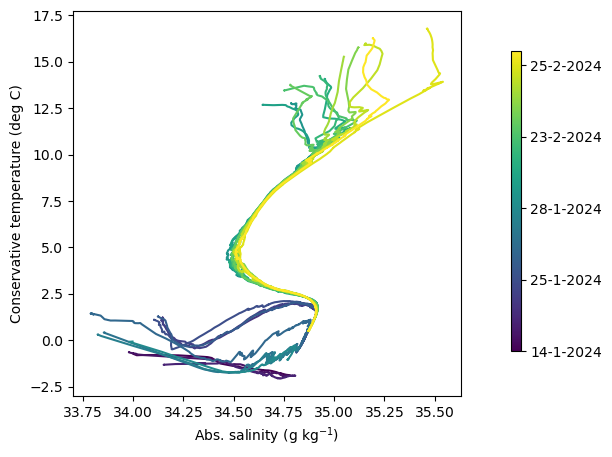

In [15]:
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot()

for i in range(0, len(CTDs)):
    ax.plot(absolute_salinity[i], conservative_temperature[i], color = colors[i])

ax.set_xlabel('Abs. salinity (g kg$^{-1}$)')
ax.set_ylabel('Conservative temperature (deg C)');

cax = fig.add_axes([1.0, 0.2, 0.02, 0.6])
cbar = plt.colorbar(mapper, cax = cax)
cbar.set_ticks(np.arange(0, len(CTDs), 5))
cbar.set_ticklabels(date[::5]);

Instead of plotting gridlines like we've been doing so far, we can plot equal density lines, which will be a useful reference. We will need to create a density array from the temperature and salinity axis in our figure.

In [16]:
temp_range = ax.get_ylim()
salt_range = ax.get_xlim()

temp_axis = np.linspace(temp_range[0], temp_range[1], 50)
salt_axis = np.linspace(salt_range[0], salt_range[1], 50)

temp_axis, salt_axis = np.meshgrid(temp_axis, salt_axis)
density_reference = gsw.sigma0(salt_axis, temp_axis)

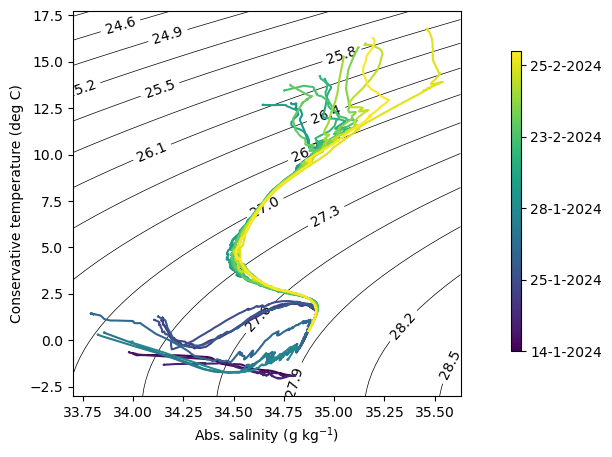

In [17]:
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot()

pref = ax.contour(salt_axis, temp_axis, density_reference, levels = 15, 
                  colors = ['k'], linewidths = [.5], zorder = 0)
plt.clabel(pref, inline = True, zorder = 0)

for i in range(0, len(CTDs)):
    ax.plot(absolute_salinity[i], conservative_temperature[i], color = colors[i])

ax.set_xlabel('Abs. salinity (g kg$^{-1}$)')
ax.set_ylabel('Conservative temperature (deg C)');

cax = fig.add_axes([1.0, 0.2, 0.02, 0.6])
cbar = plt.colorbar(mapper, cax = cax)
cbar.set_ticks(np.arange(0, len(CTDs), 5))
cbar.set_ticklabels(date[::5]);

#### Question 2

Can you identify which regions in the TS plot are stabily stratified and which ones aren't?

*Answer here*

### Making TS diagrams even better

Instead of coloring the profiles by date, we really choose any variable to color with. For that, I have asked [CoPilot](https://copilot.microsoft.com/) to help me with the following prompt:

*"I want to do a line plot with pyplot, where I am plotting X vs Y, and I'd like the line to be colored according to a third variable Z with max and min colors defined by me. How can I do that?"*

This was the answer:

```
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Example data (replace with your own)
x = np.arange(10)  # X values
y = np.random.rand(10)  # Y values
Z = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])  # Third variable (Z)

# Normalize Z to [0, 1]
normalized_Z = (Z - np.min(Z)) / (np.max(Z) - np.min(Z))

# Choose a colormap (e.g., 'jet')
colormap = cm.jet

# Create the line plot with colored segments
fig, ax = plt.subplots()
for i in range(len(x) - 1):
    ax.plot([x[i], x[i + 1]], [y[i], y[i + 1]], c=colormap(normalized_Z[i]))

# Add a colorbar
im = ax.scatter(x, y, c=normalized_Z, s=0, cmap=colormap)
fig.colorbar(im)

# Customize other plot settings (labels, title, etc.)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Line Plot with Colored Segments")

plt.show()

```

The above works well for one profile, but we can tweak it to work for our iteration through multiple profiles:

In [43]:
# Define min (surface) and max (largest depth I want to appear in my colormap):
vmin = 0
vmax = 4000
colormap = plt.get_cmap('jet_r')

Now we are ready to plot:

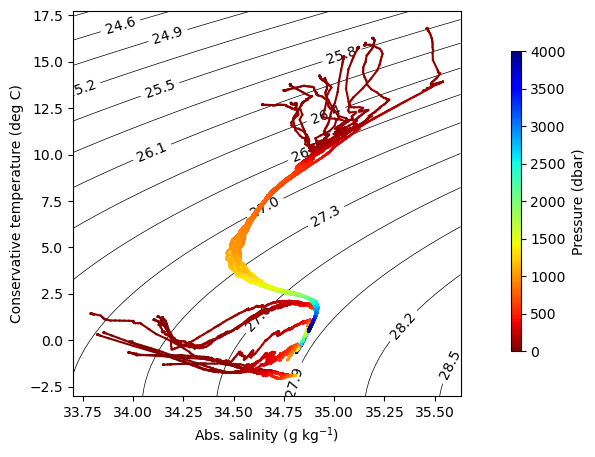

In [44]:
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot()

pref = ax.contour(salt_axis, temp_axis, density_reference, levels = 15, 
                  colors = ['k'], linewidths = [.5], zorder = 0)
plt.clabel(pref, inline = True, zorder = 0)

for i in range(0, len(CTDs)):
    normalized_pressure = (CTDs[i]['pressure'] - vmin) / (vmax - vmin)

    for p in range(len(CTDs[i]['pressure']) - 1):
        ax.plot([absolute_salinity[i][p], absolute_salinity[i][p + 1]], 
                [conservative_temperature[i][p], conservative_temperature[i][p + 1]], 
                c = colormap(normalized_pressure[p]))

ax.set_xlabel('Abs. salinity (g kg$^{-1}$)')
ax.set_ylabel('Conservative temperature (deg C)');

# Let's create a scatter with no markers (setting size s = 0) for the colorbar
im = ax.scatter(np.linspace(34, 35, vmax), np.linspace(0, 15, vmax), 
                c = np.arange(vmin, vmax, 1), s = 0, cmap = colormap)

cax = fig.add_axes([1.0, 0.2, 0.02, 0.6])
cbar = plt.colorbar(im, cax = cax)
cbar.set_ticks(np.arange(vmin, vmax+500, 500))
cbar.set_label('Pressure (dbar)');

#### Question 3

**a.** The colormap we used for the plot above, `jet`, is not colorblind friendly. Check out [`cmocean`](https://matplotlib.org/cmocean/) and choose a better colormap.

**b.** Instead of colouring by pressure, look at what other variables our CTD profiles have, and choose another (i.e. oxygen, nutrients). Play around with `vmin`, `vmax` to get the most out of your plot, choose different colormaps, etc.

*Answer here*